In [ ]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 438 kB 54.0 MB/s 
     |████████████████████████████████| 1.7 MB 59.0 MB/s 
     |████████████████████████████████| 5.9 MB 47.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [ ]:
##import some basic libraray
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#divide the dataset into and dependent feature

X = dataset.iloc[:,3:13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y = dataset.iloc[:,-1]

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
##feature enginerring
pd.get_dummies(X['Geography'],drop_first='True')

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
geography = pd.get_dummies(X['Geography'],drop_first='True')
gender = pd.get_dummies(X['Gender'],drop_first='True')

In [ ]:
##concatenate these variables with dataframe
X = X.drop(['Geography', 'Gender'],axis = 1)#axis = 1 to drop the column, not the rows

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
from numpy.core.function_base import geomspace
#now comes the concatenation part 
X = pd.concat([X,geography,gender], axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#now comes the time to train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
y.shape

(10000,)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
##part 2 now lets create the ANN
#import tensorflow libraries
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#intialize the ANN
classifier = Sequential()

In [ ]:
##adding the input layer
classifier.add(Dense(units = 11, activation = 'relu'))

In [ ]:
## Adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 6, activation = 'relu'))

In [ ]:
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# by default adam uses the learning rate of 0.01
#by providing by ourself
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#this will not stop until it runs the 1000 epochs and even if
#the accuracy is not increasing
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000)

Epoch 1/1000
532/536 [============================>.] - ETA: 0s - loss: 0.4469 - accuracy: 0.8068

KeyboardInterrupt: ignored

In [ ]:
##Early stopping
#monitor 
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)


Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3534 - accuracy: 0.8580 - val_loss: 0.3701 - val_accuracy: 0.8470
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3483 - accuracy: 0.8599 - val_loss: 0.3648 - val_accuracy: 0.8516
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3472 - accuracy: 0.8591 - val_loss: 0.3645 - val_accuracy: 0.8504
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3447 - accuracy: 0.8623 - val_loss: 0.3641 - val_accuracy: 0.8546
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3414 - accuracy: 0.8617 - val_loss: 0.3638 - val_accuracy: 0.8531
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3405 - accuracy: 0.8636 - val_loss: 0.3671 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3378 - accuracy: 0.8623 - val_loss: 0.3715 - val_accuracy:

In [ ]:
model_history

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

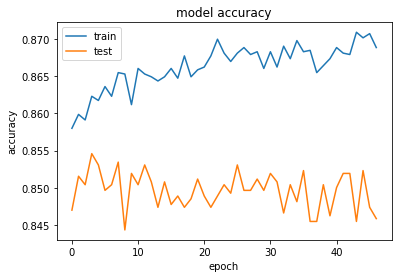

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

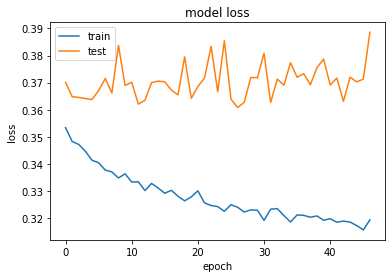

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#part 3 making the predictor
#predictiing the new value
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1569,   38],
       [ 247,  146]])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)

In [ ]:
score

0.8575

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.98      0.86      0.92      1816
        True       0.37      0.79      0.51       184

    accuracy                           0.86      2000
   macro avg       0.67      0.83      0.71      2000
weighted avg       0.92      0.86      0.88      2000



In [ ]:
##get the weights 
classifier.get_weights()

[array([[-6.9782484e-01, -3.5292402e-01,  6.3370311e-01, -4.6720704e-01,
          3.8483950e-01,  1.8730767e-01, -9.1518974e-01,  5.7066882e-01,
          1.5061976e-01, -2.5516582e-01, -1.9520925e-01],
        [-1.1532565e+00,  3.6262195e+00, -1.4089233e+00,  2.4556501e+00,
         -7.8907919e-01, -7.3957628e-01, -2.2000177e+00, -2.3345687e+00,
         -4.2048645e+00, -2.4512165e+00,  8.6300278e-01],
        [-9.6126461e-01,  3.3849478e-01, -3.5729405e-01,  4.0898928e-01,
         -3.8974765e-01, -2.2267307e-01,  1.0148969e+00,  1.7131846e+00,
         -2.7730224e-01, -4.4168398e-02, -2.1490300e-01],
        [ 1.2003639e+00, -1.6208745e+00,  1.7335550e+00, -1.3183769e+00,
         -2.1418819e+00, -2.7553382e+00,  1.3360751e+00,  4.4473058e-01,
          1.5981660e+00, -2.6732690e+00,  9.8141438e-01],
        [ 1.7434044e-01, -3.0764492e+00, -1.3454096e+00,  1.0572089e-01,
         -1.6610721e+00, -4.4509883e+00, -1.9308012e+00, -2.1580558e-02,
         -3.8277064e-02, -6.3348293e-0